<a href="https://colab.research.google.com/github/daffavcd/PCVK-2022/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM 1

Mounted at /content/drive
 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 1


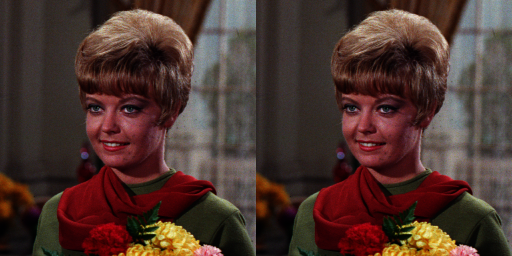

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import math
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/ImagesCV/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

#access every pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c]= np.clip(255*((original[y,x,c]/255)**(1/gamma)),0,255)
      # gamma_image[y,x,c]= np.clip(255*pow(original[y,x,c]/255, 1/gamma),0,255)

final_frame = cv.hconcat((original,gamma_image))
cv2_imshow(final_frame)

# PRAKTIKUM 2

 Bit Depth pada citra 
----------------------------------
Masukkan nilai Bit Depth: 2


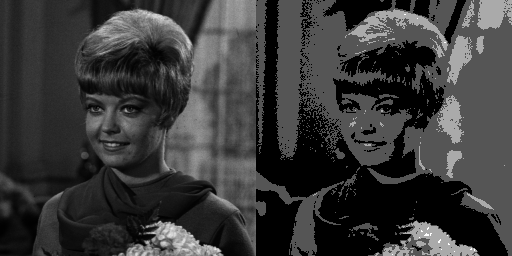

In [3]:
original2 = cv.imread('/content/drive/MyDrive/ImagesCV/female.tiff',cv.IMREAD_GRAYSCALE)

print(' Bit Depth pada citra ')
print('----------------------------------')
try:
 depth = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
 print('Error, not a number')

level=255/((2**depth)-1)

bitDepth_image = np.zeros(original2.shape, original2.dtype)

#access every pixel
for y in range(original2.shape[0]):
  for x in range(original2.shape[1]):
    bitDepth_image[y,x]= np.clip(round(original2[y,x]/level) * level, 0, 255)
      # bit_depth_img[y,x,c] = np.clip(round(original2[y,x,c]/level)*level, 0, 255)
      # bitDepth_image[y,x,c]= np.clip(255*pow(original2[y,x,c]/255, 1/gamma),0,255)

final_frame = cv.hconcat((original2,bitDepth_image))
cv2_imshow(final_frame)


# PRAKTIKUM 3

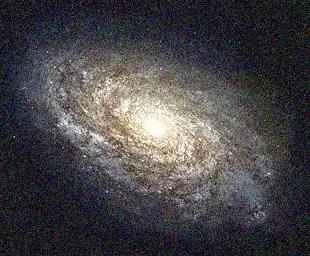

In [6]:
import glob
import math
cv_img = []
for img in glob.glob('/content/drive/MyDrive/ImagesCV/galaxy/*.jpg'):
 n= cv.imread(img)
 cv_img.append(n)

dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 99, 1)
cv2_imshow(dst)

In [9]:
def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    # print(x)
  mse = np.mean((first_image) ** 2)
  if(mse == 0): 
    return 100
  max_pixel = 255.0
  result = 20 * math.log10(max_pixel / math.sqrt(mse))
  return result

print(' PSNR Average Denoising')
print('----------------------------------')
try:
  averageCitra = int(input('Masukkan jumlah citra Average: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img,averageCitra)
print('Nilai PSNR : ')
print(result)

 PSNR Average Denoising
----------------------------------
Masukkan jumlah citra Average: 5
Nilai PSNR : 
27.88467710645837


# PRAKTIKUM 4

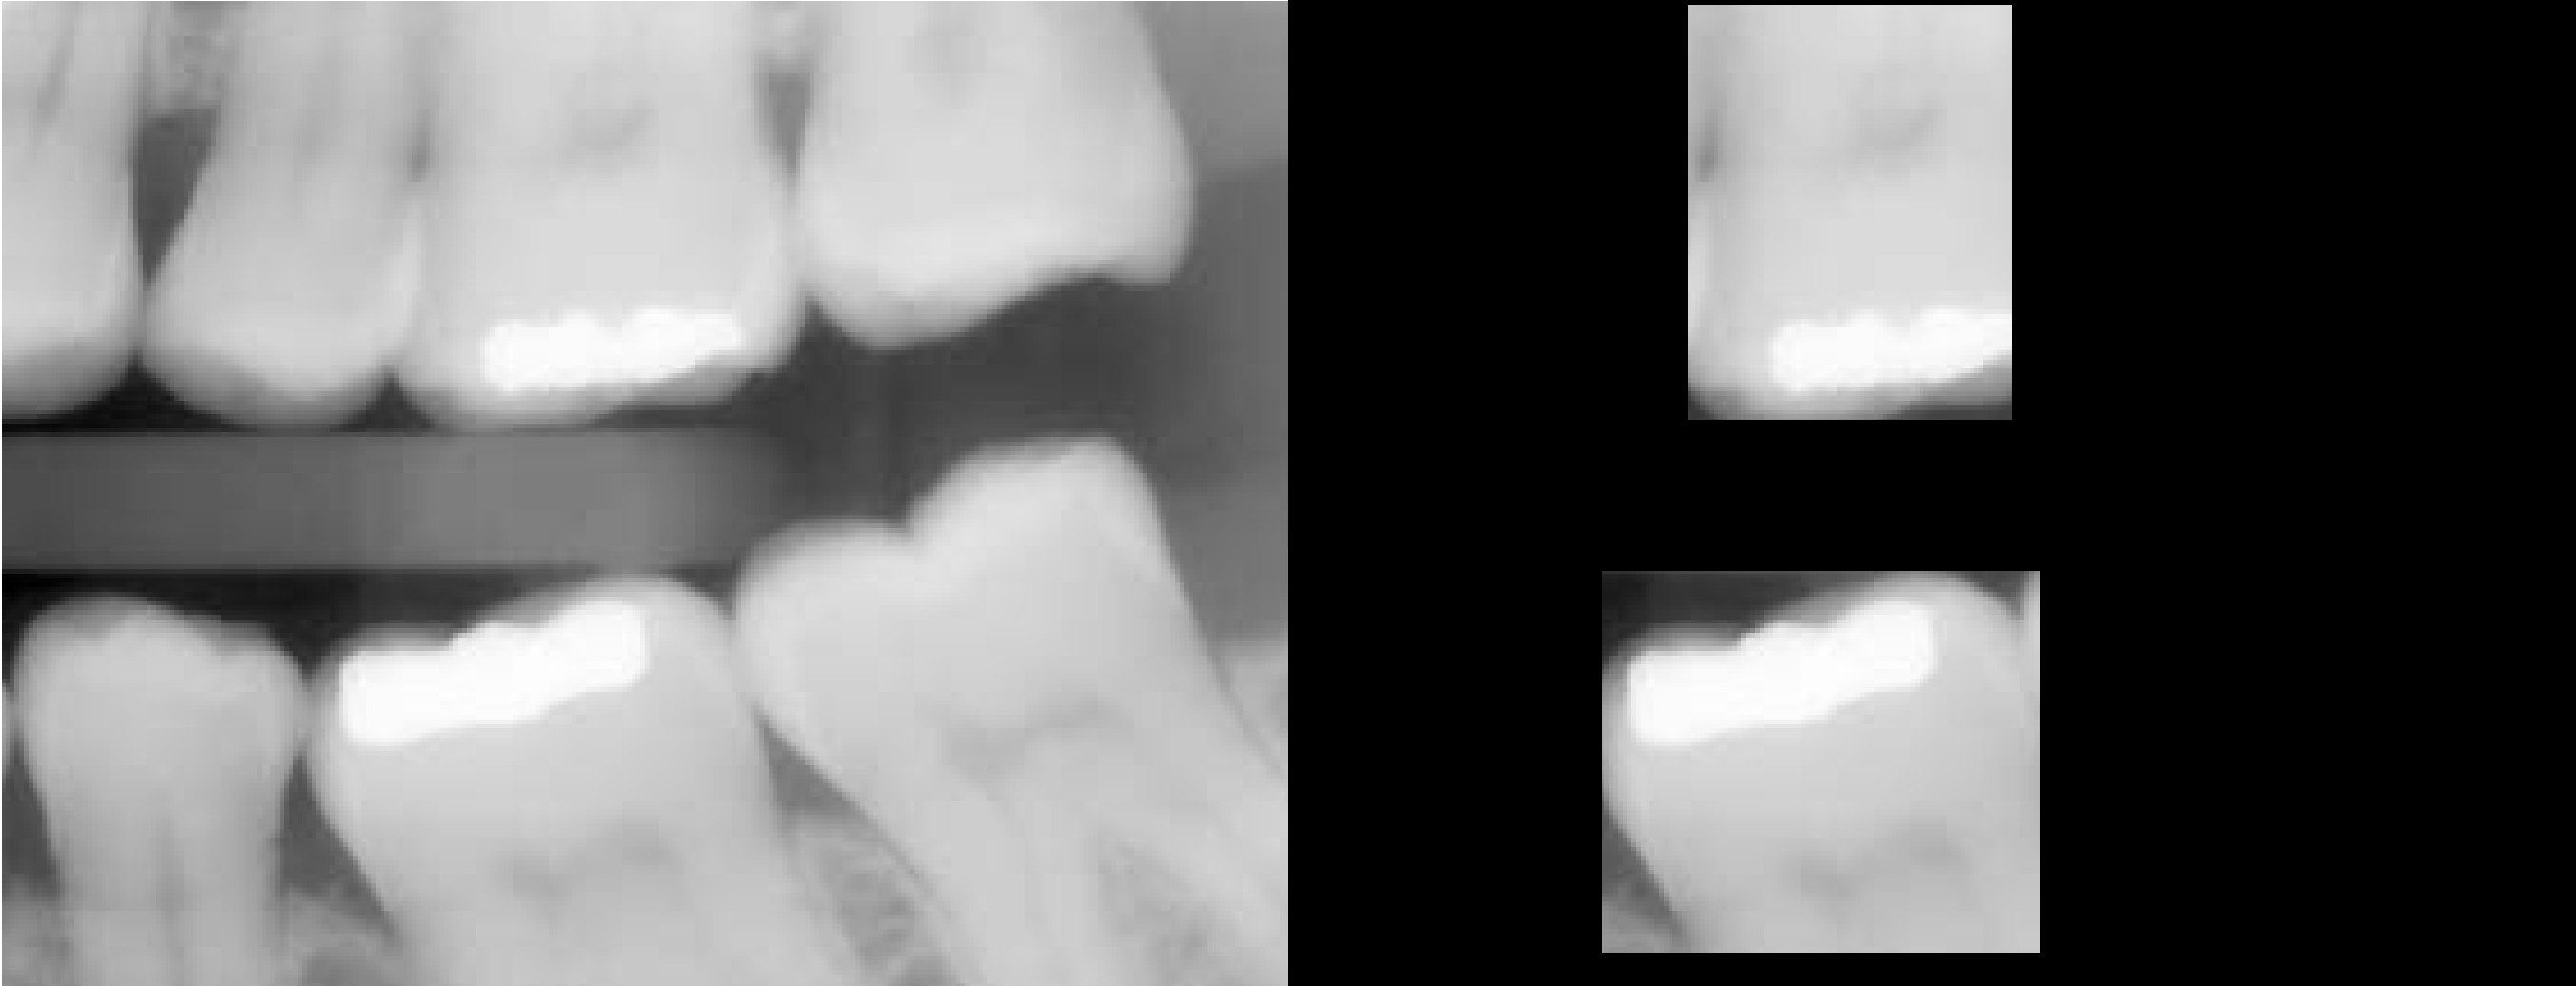

---------------OR-------------------


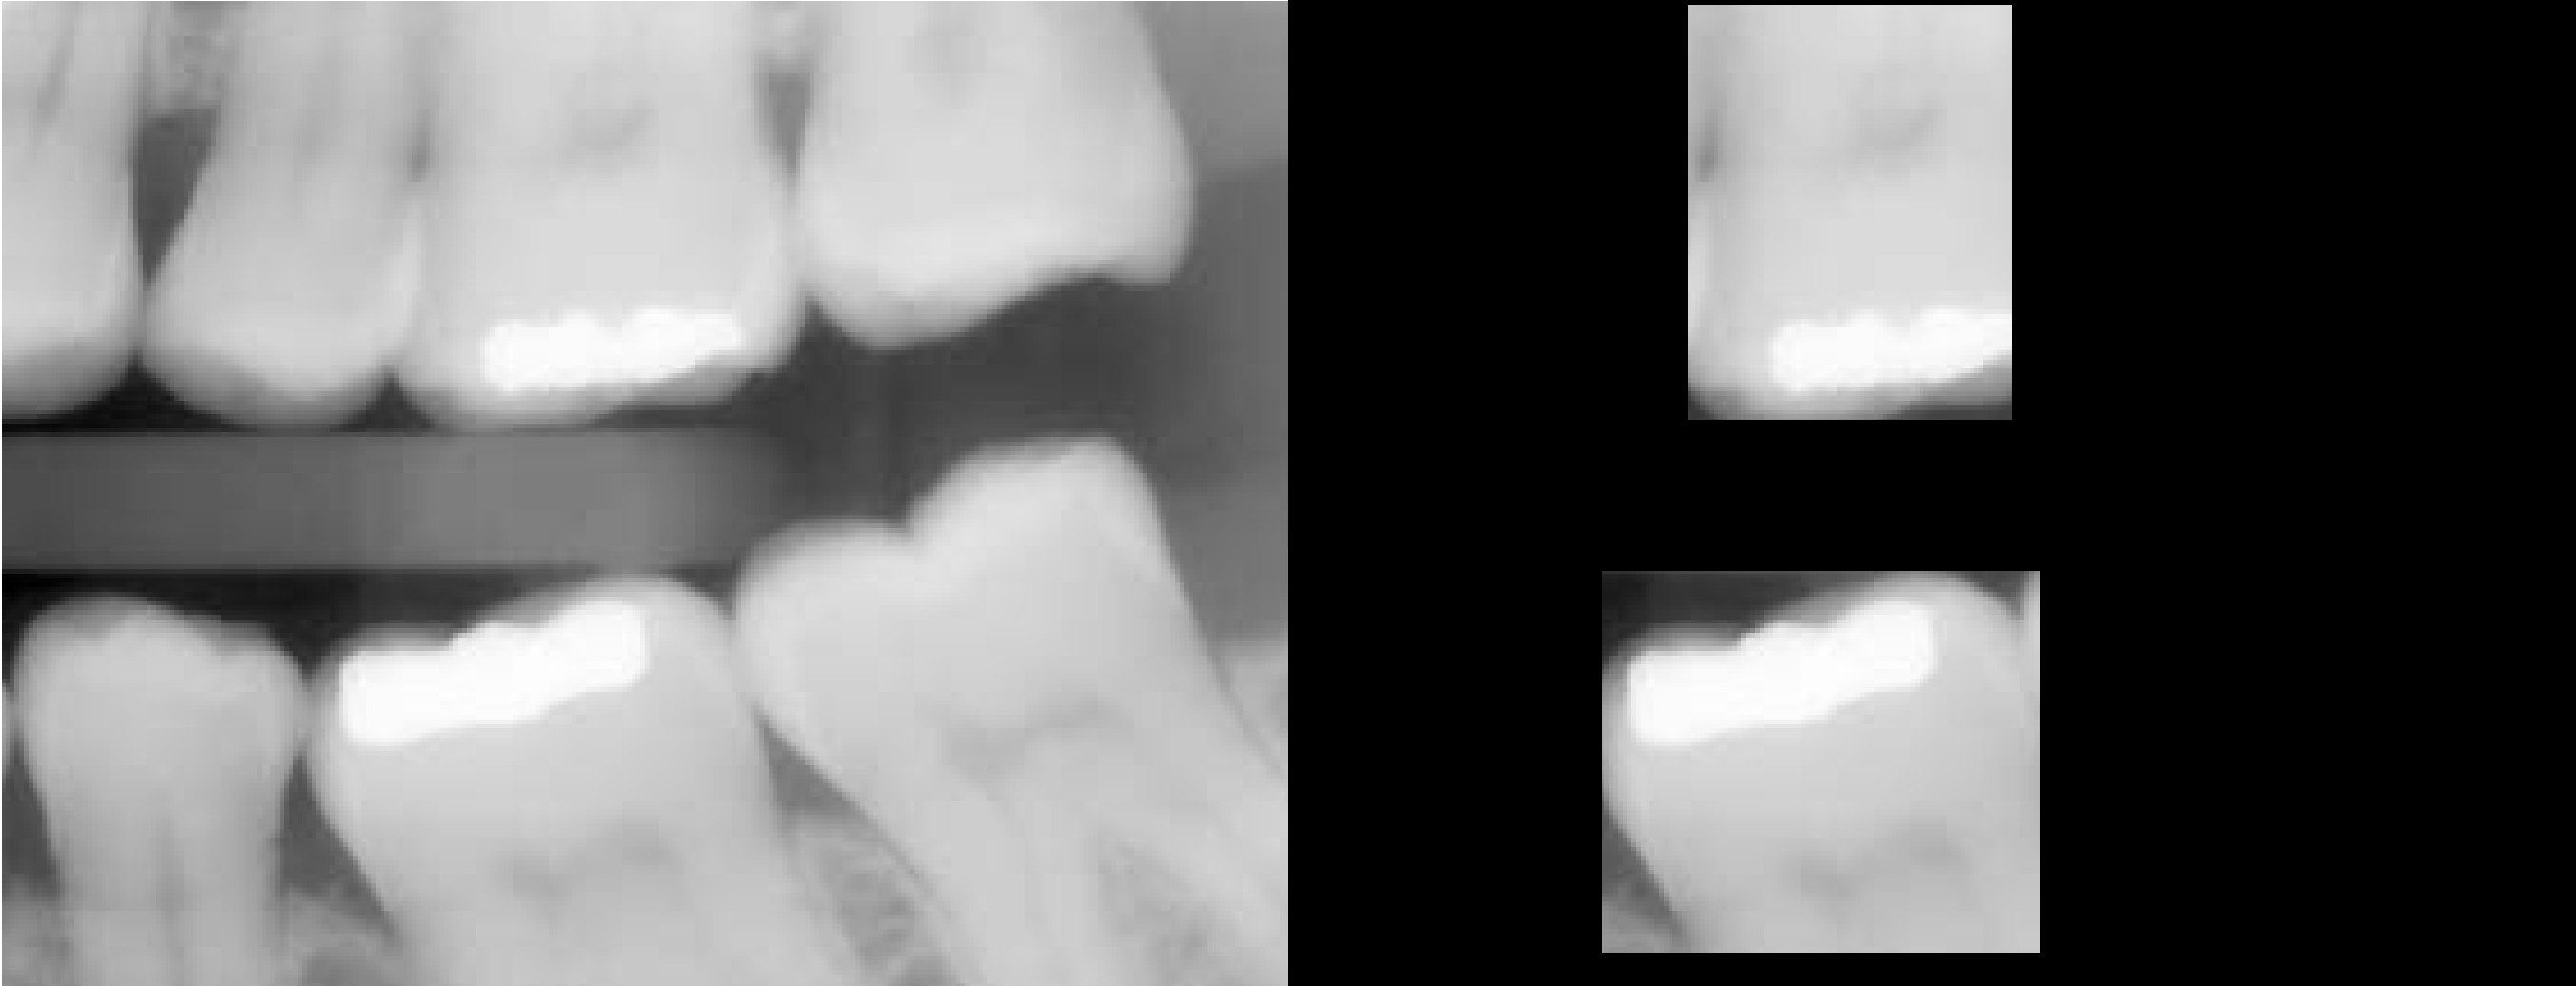

-----------------NOT-----------------


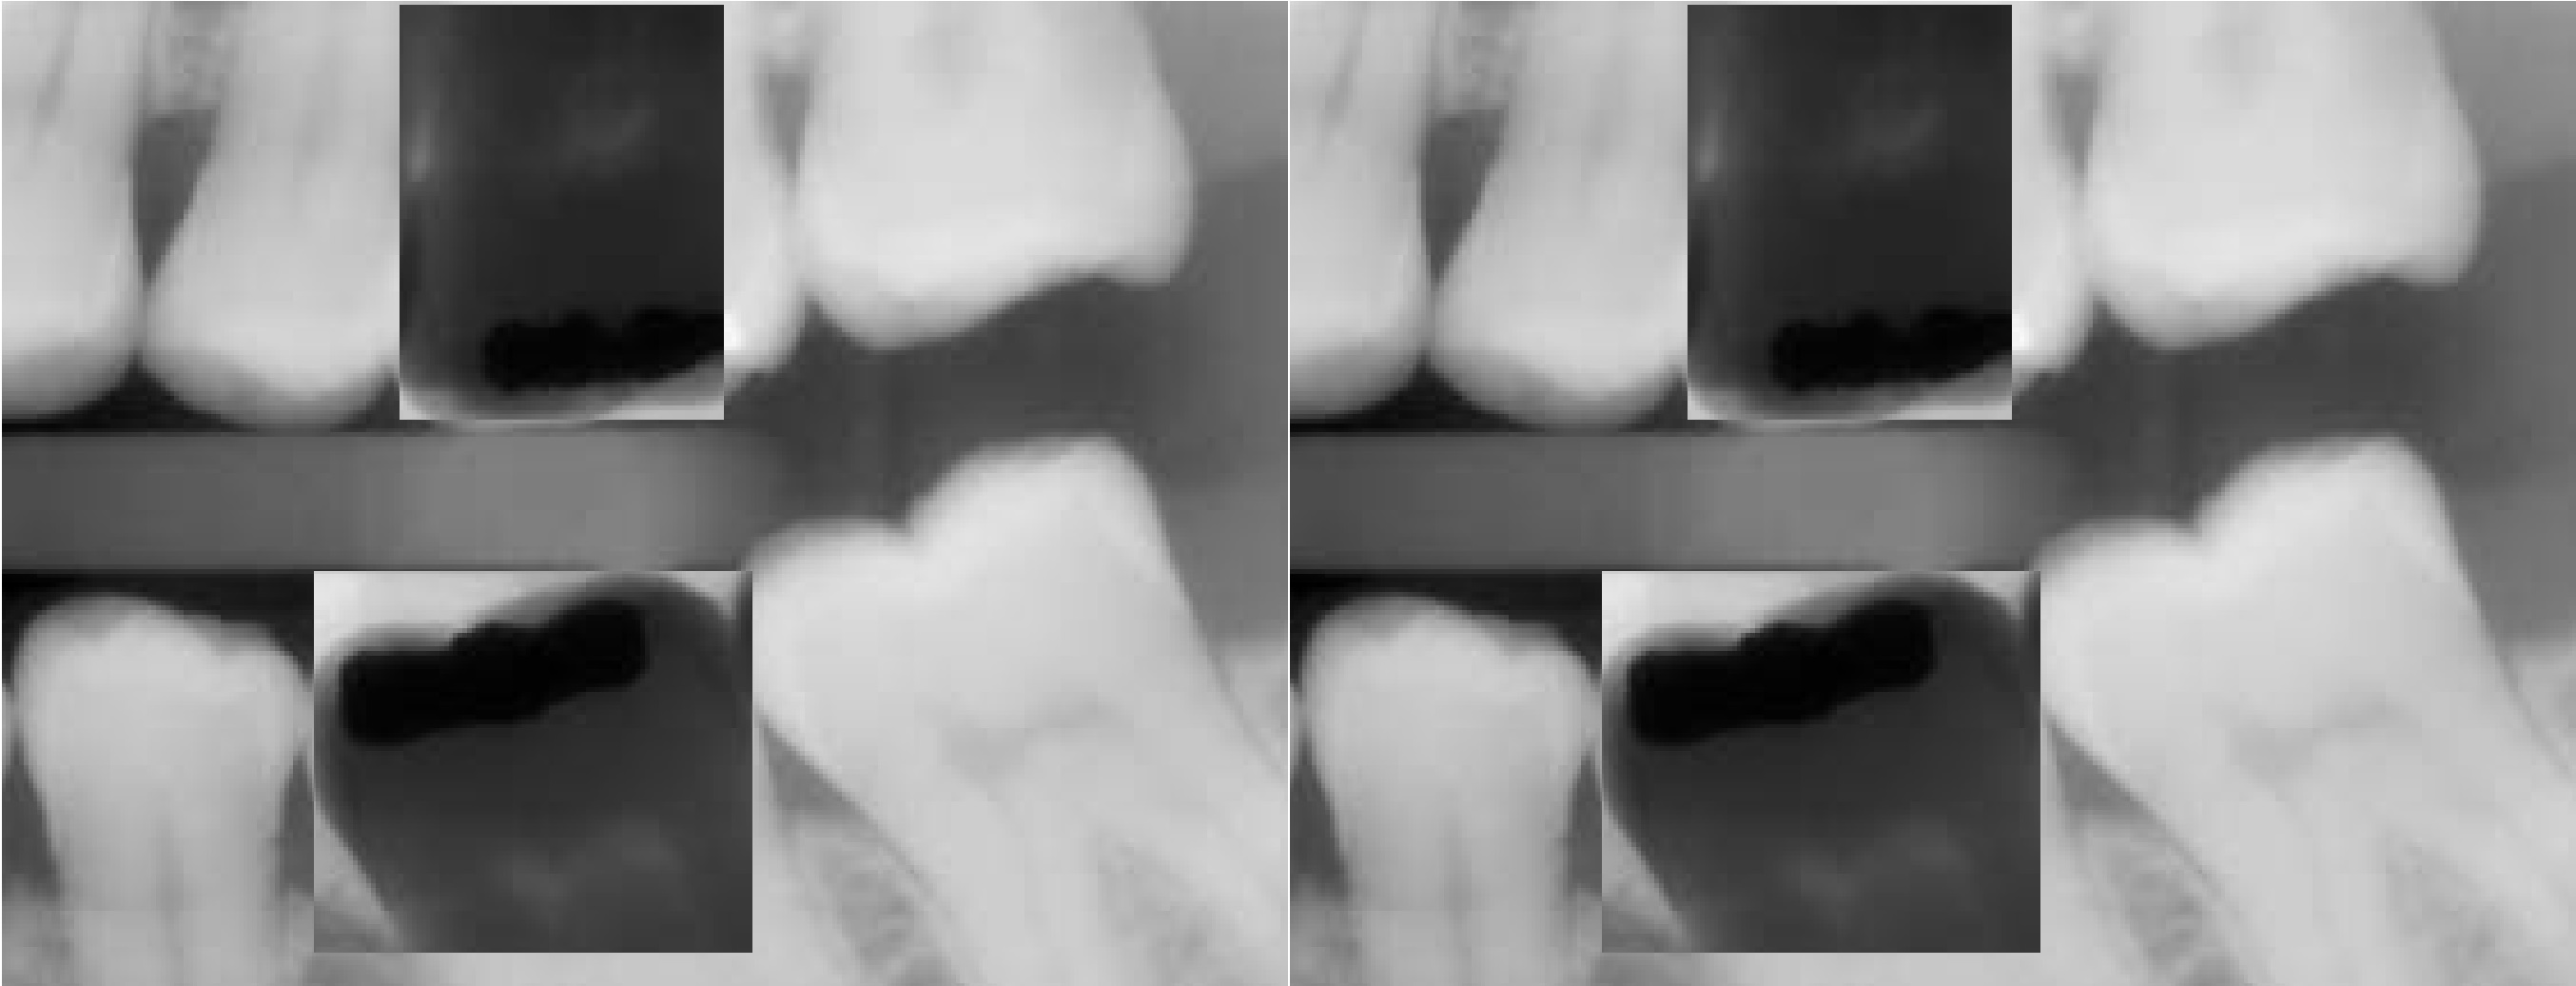

--------------NAND--------------------


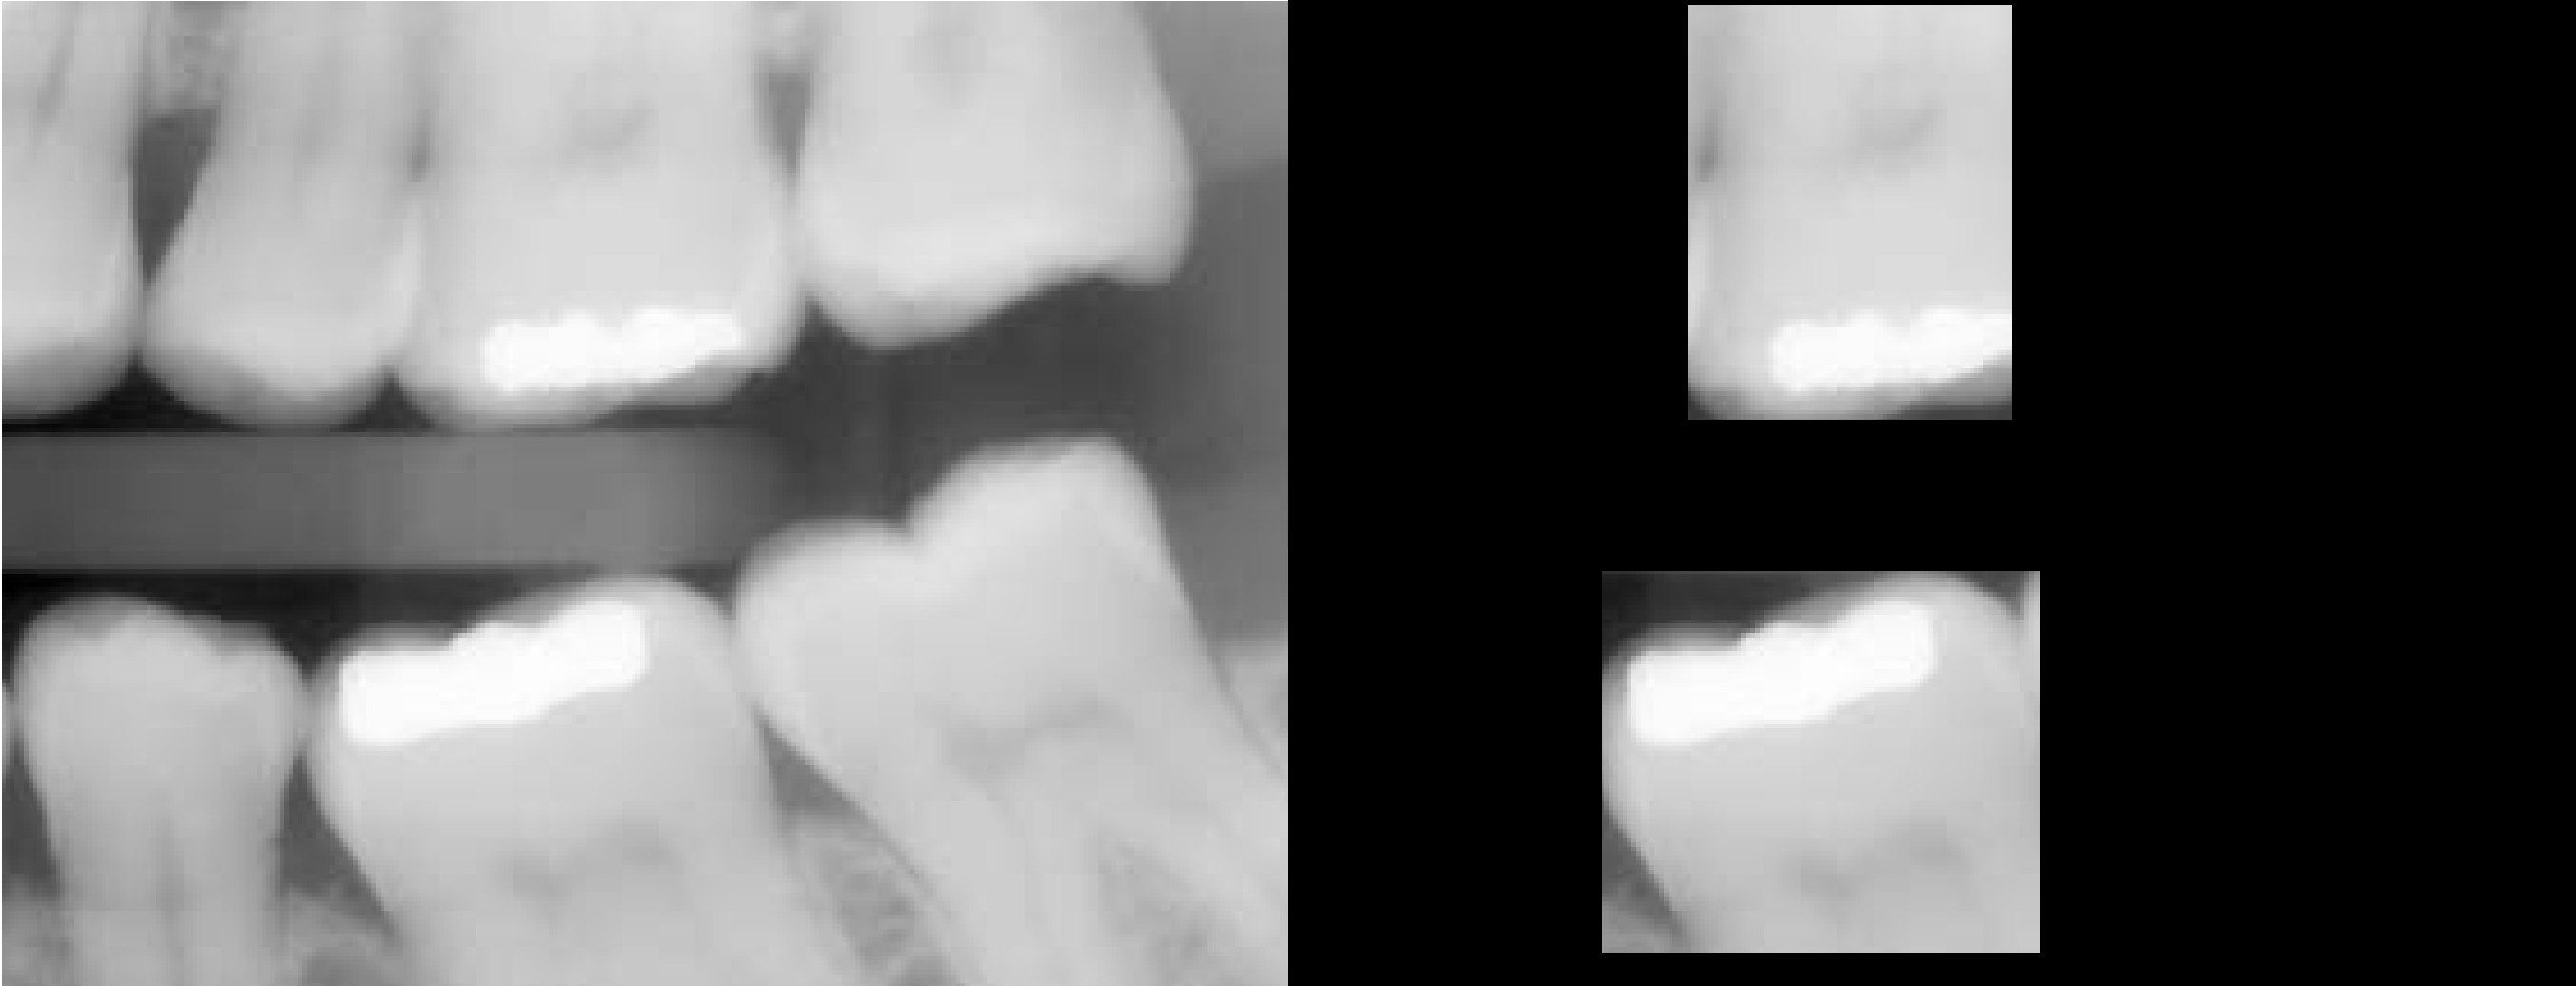

----------------XOR------------------


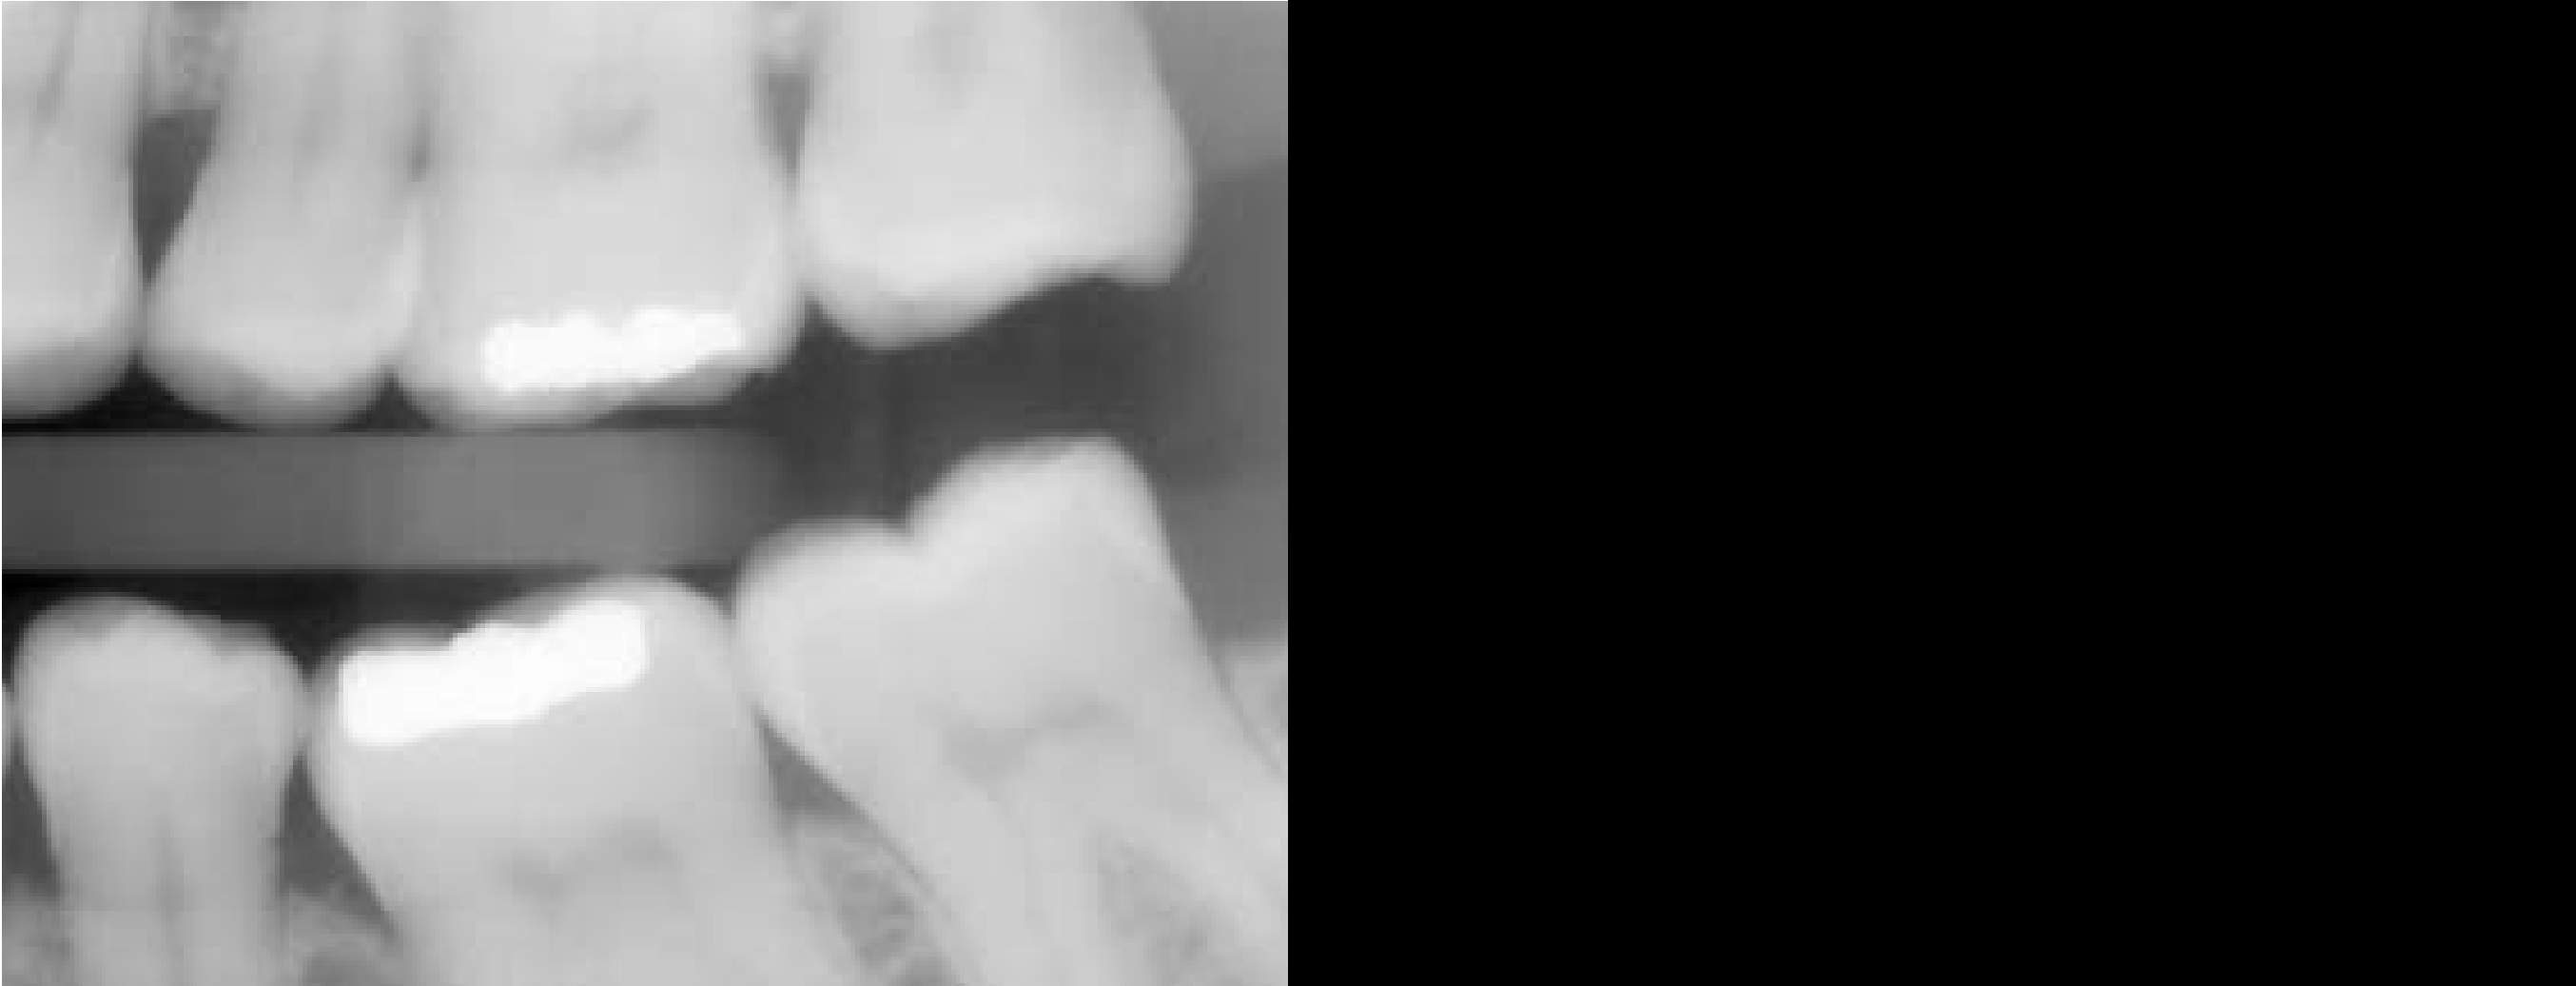

In [32]:
gigi = cv.imread('/content/drive/MyDrive/ImagesCV/teeth.jpg')

# buat masking untuk setiap pixel value 0
mask = np.zeros(gigi.shape[:2], dtype="uint8")

# buat masking rectangle untuk pixel value 255
cv.rectangle(mask, (420, 5), (760, 440), 255, -1)
cv.rectangle(mask, (330, 600), (790, 1000), 255, -1)

# performing a bitwise_and with the gigi and the mask
masked = cv.bitwise_and(gigi, gigi, mask=mask)

final_frame = cv.hconcat((gigi, masked))
cv2_imshow(final_frame)

print('---------------OR-------------------')

# MENGGUNAKAN OR
maskOr = np.zeros(gigi.shape[:2], dtype="uint8")

cv.rectangle(maskOr, (420, 5), (760, 440), 255, -1)
cv.rectangle(maskOr, (330, 600), (790, 1000), 255, -1)

maskOred = cv.bitwise_or(gigi, gigi, mask=maskOr)

final_frame = cv.hconcat((gigi, maskOred))
cv2_imshow(final_frame)

print('-----------------NOT-----------------')

# MENGGUNAKAN NOT
maskNOT = np.zeros(gigi.shape[:2], dtype="uint8")

cv.rectangle(maskNOT, (420, 5), (760, 440), 255, -1)
cv.rectangle(maskNOT, (330, 600), (790, 1000), 255, -1)

maskNOTed = cv.bitwise_not(gigi, gigi, mask=maskNOT)

final_frame = cv.hconcat((gigi, maskNOTed))
cv2_imshow(final_frame)

print('--------------NAND--------------------')

# MENGGUNAKAN NAND
maskNAND = np.zeros(gigi.shape[:2], dtype="uint8")

cv.rectangle(maskNAND, (420, 5), (760, 440), 255, -1)
cv.rectangle(maskNAND, (330, 600), (790, 1000), 255, -1)

maskedNOT2 = cv.bitwise_not(gigi, gigi, mask=maskNAND)
maskedNAND2 = cv.bitwise_and(maskedNOT2, maskedNOT2, mask=maskNAND)

final_frame = cv.hconcat((gigi, maskedNAND2))
cv2_imshow(final_frame)

print('----------------XOR------------------')

# MENGGUNAKAN XOR
maskXOR =  np.zeros(gigi.shape[:2], dtype="uint8")

cv.rectangle(maskXOR, (420, 5), (760, 440), 255, -1)
cv.rectangle(maskXOR, (330, 600), (790, 1000), 255, -1)

maskXORed = cv.bitwise_xor(gigi, gigi, mask=maskXOR)

final_frame = cv.hconcat((gigi, maskXORed))
cv2_imshow(final_frame)